In [1]:
#Imports
import sys
sys.path.append('../python/')
import NGC5533_functions as nf

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import lmfit as lm
import dataPython as dp

from datetime import datetime
import time as t

In [2]:
starttime = t.time()

data = dp.getXYdata('data/noord_disk_100kpc')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])



#change r_dat so it's strictly increasing
r_dat, v_dat= (np.asarray(list(a)) for a in zip(*sorted(zip(r_dat, v_dat))))

#weighdata = (1/v_err1)

In [3]:
# Function for fitting all parameters (n, re, h)
#def f(r,M,rc,rho00,c,n,re,h,pref):
#    return np.sqrt(nf.bh_v(r,M)**2 
#                   + nf.h_v(r,rc,rho00,load=True)**2 
#                   + c**2*nf.b_v(r,n,reload=True)**2 
#                   + nf.d_v(r,h,pref,load=True)**2)

# Function for fitting only prefactors + halo's parameters
def g(r,pref):
    return np.sqrt(pref**2*nf.d_v(r,load=True)**2)



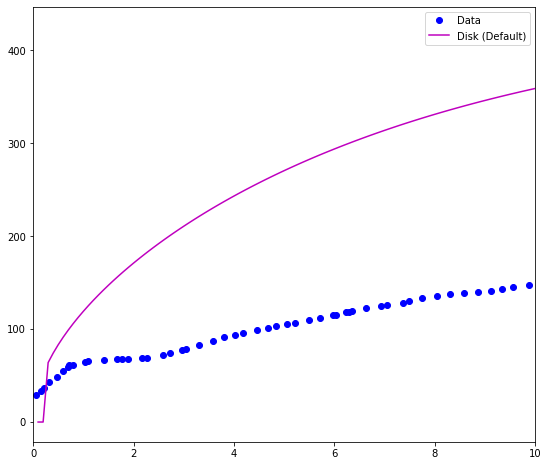

In [4]:
#Plot 

fig = plt.figure(figsize=(9.0,8.0))

plt.xlim(0,10)

rval = np.arange(0.1,200,0.1)

plt.plot(r_dat,v_dat,'bo',label='Data')
plt.plot(rval,nf.d_v(rval,load=True),color='m',label='Disk (Default)')


plt.legend()
#plt.savefig('Fitting_allcomponents_125kpc.png')
plt.show()

In [5]:
# Fit, using all parameters

#Setup
#l_mod = lm.Model(f)
#l_params = l_mod.make_params()
#Black Hole
#l_params.add('M', value=nf.Mbh_def, min=0) #Mass
#Bulge
#l_params.add('c', value=1, min=0)          #Contributions should all add
#l_params.add('n', value=nf.n_c, min=0)
#l_params.add('re', value=nf.re_c, min=0)
#Disk
#l_params.add('pref', value=nf.pref_def, min=0, max=1000)
#l_params.add('h', value=nf.h_c, min=0, max=1000)
#Halo
#l_params.add('rc', value=nf.h_rc, min=0)   #Radius (magnitude)
#l_params.add('rho00', value=nf.hrho00_c, min=0) #Density (halo)

#Do fit
#l_fit = l_mod.fit(v_dat,l_params,r=r_dat,weights=weighdata)

In [6]:
# Fit, using prefactors

#Setup
g_mod = lm.Model(g)
g_params = g_mod.make_params()

#Disk
g_params.add('pref', value=1,min=0, max=100)

#Do fit
g_fit = g_mod.fit(v_dat,g_params,r=r_dat)

In [7]:
#Define curves to plot

##### Commenting l-curve out because it gave me an error: OverflowError: (34, 'Result too large')

#l_dict = l_fit.best_values
#l_M = l_dict['M']
#l_c = l_dict['c']
#l_n = l_dict['n']
#l_re = l_dict['re']
#l_h = l_dict['h']
#l_pref = l_dict['pref']
#l_rc = l_dict['rc']
#l_hrho00 = l_dict['rho00']

#l_curve = f(r_dat,l_M,l_c,l_n,l_re,l_h,l_pref,l_rc,l_hrho00)


g_dict = g_fit.best_values

g_pref = g_dict['pref']


g_curve = g(r_dat,g_pref)

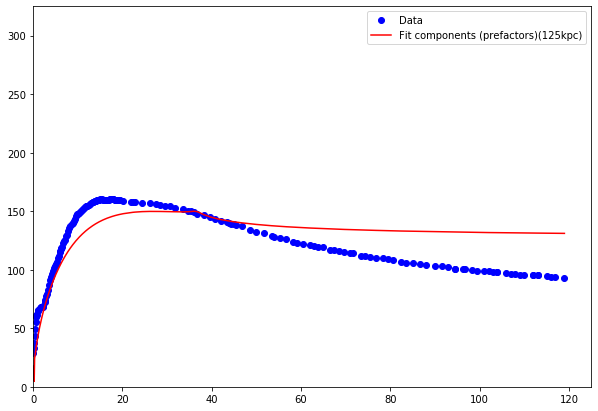

In [8]:
#Plot to 125kpc

fig = plt.figure(figsize=(10,7))

plt.xlim(0,125)
plt.ylim(0,325)

plt.plot(r_dat,v_dat,'bo',label='Data')

plt.plot(r_dat,g_curve,'r-',label='Fit components (prefactors)(125kpc)')

plt.legend()
plt.savefig('Fitting_allcomponents_125kpc.png')
plt.show()

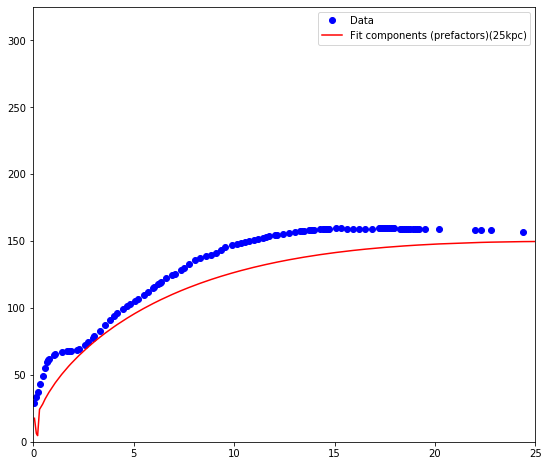

In [9]:
#Plot to 20kpc

fig = plt.figure(figsize=(9.0,8.0))

plt.xlim(0,25)
plt.ylim(0,325)

plt.plot(r_dat,v_dat,'bo',label='Data')
#plt.plot(r_dat,l_curve,'b-',label='Fit components (all) (25kpc)')
plt.plot(r_dat,g_curve,'r-',label='Fit components (prefactors)(25kpc)')
#plt.plot(r_dat,g(r_dat,nf.Mbh_def,nf.h_rc,nf.hrho00_c,1,1),label='Total Curve (Default)')

plt.legend()
plt.savefig('Fitting_allcomponents_25kpc.png')
plt.show()

In [10]:
#print('Fit information for all-component fit, no prefactor:')
#l_fit

In [11]:
print('Fit information for all-component fit, prefactor:')
g_fit

Fit information for all-component fit, prefactor:


In [12]:
import time as t

starttime = t.time()   #put this at beginning of code
endtime = t.time()     #put this at end of code
print('Total Time:')
runtime = endtime - starttime

if runtime<=3600:
    minutes, runtime= divmod(runtime, 60)
    print(str(minutes)+'min', str(round(runtime))+'s')

elif runtime>3600 and runtime<=86400:
    minutes = runtime/60
    hours, minutes= divmod(minutes, 60)
    print(str(hours)+'hrs', str(round(minutes))+'min')

elif runtime>86400:
    hours = runtime/3600
    days, hours= divmod(hours, 24)
    print(str(days)+'days', str(round(hours))+'hrs')

Total Time:
0.0min 0s
